In [2]:
import pandas as pd
from nilearn.plotting import plot_design_matrix
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/home/ubuntu/repos/learning-habits-analysis')
from utils.data import Subject

In [3]:
first_lvl_dir = "/home/ubuntu/data/learning-habits/spm_format_20250603/outputs/glm2_chosen_2025-10-29-02-11"
#first_lvl_dir = "/home/ubuntu/data/learning-habits/spm_format_20250603/outputs/glm2_diff_timing_2025-10-29-12-13"

In [4]:
def clean_spm_colname(col):
    if '*bf(1)' in col:
        col = col.replace('*bf(1)', '')
    if '^1' in col:
        col = col.replace('^1', '')
    return col.strip()

def read_dm(dm_path, clean_colnames=True):
    colnames_file = dm_path.replace('design_matrix.csv','column_names.txt')
    # Read column names for both design matrices
    with open(colnames_file, 'r') as f:
        colnames = [line.strip() for line in f.readlines()]

    if clean_colnames:
        colnames = [clean_spm_colname(col) for col in colnames]
    # Read design matrices using the column names
    dm = pd.read_csv(dm_path, header=None, names=colnames)

    return dm

In [7]:
dms_paths = sorted(
    glob.glob(os.path.join(first_lvl_dir, '**', '*design_matrix.csv'), recursive=True)
)
dms_learning = [read_dm(p) for p in dms_paths if 'learning/' in p]
dms_test = [read_dm(p) for p in dms_paths if 'test/' in p]

<Axes: label='conditions', ylabel='scan number'>

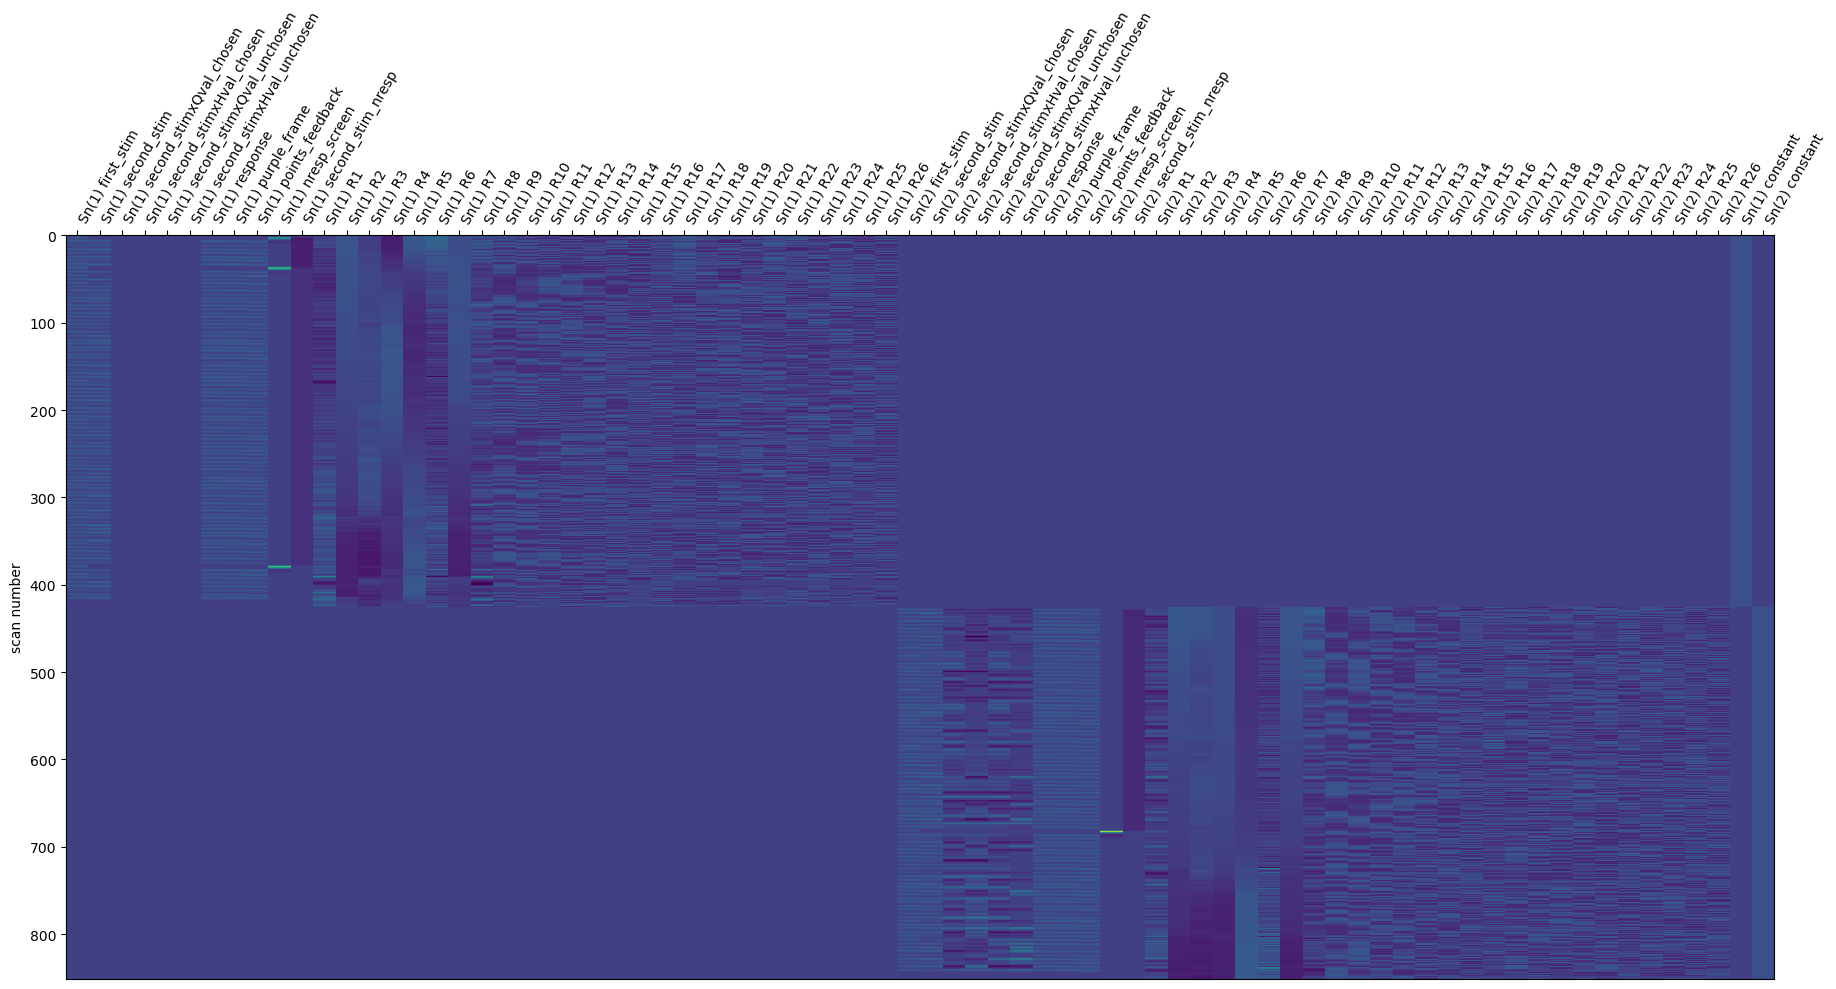

In [8]:
# Display the cleaned design matrix
plot_design_matrix(dms_learning[11])

In [9]:
cols1 = dms_learning[-2].columns.tolist()
cols2 = dms_learning[-1].columns.tolist()

In [10]:
dms_learning[11].head(30)

,Sn(1) first_stim,Sn(1) second_stim,Sn(1) second_stimxQval_chosen,Sn(1) second_stimxHval_chosen,Sn(1) second_stimxQval_unchosen,Sn(1) second_stimxHval_unchosen,Sn(1) response,Sn(1) purple_frame,Sn(1) points_feedback,Sn(1) nresp_screen,...,Sn(2) R19,Sn(2) R20,Sn(2) R21,Sn(2) R22,Sn(2) R23,Sn(2) R24,Sn(2) R25,Sn(2) R26,Sn(1) constant,Sn(2) constant
0,0.001113,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,0.116290,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.005865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,0.211977,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.199533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,0.129077,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.326794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,0.042356,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.192906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
5,0.110614,0.034241,0,0,0,0,0.028538,0.012032,0.002095,0.060419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
6,0.225350,0.146398,0,0,0,0,0.191305,0.128279,0.164138,-0.005252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
7,0.140886,0.120418,0,0,0,0,0.177356,0.137025,0.330548,-0.027901,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
8,0.042587,0.049338,0,0,0,0,0.077925,0.065120,0.213349,-0.027788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
9,-0.002358,0.007239,0,0,0,0,0.014660,0.014838,0.073050,-0.018969,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


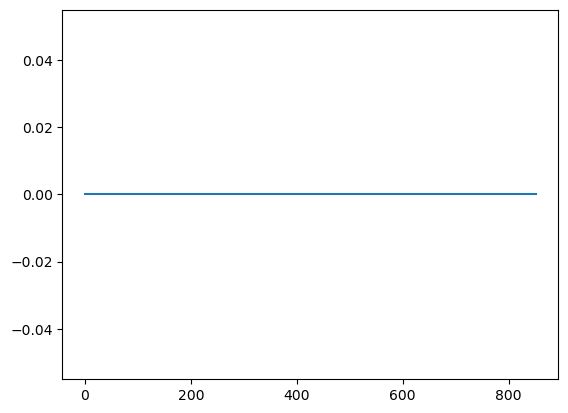

In [11]:
plt.plot(dms_learning[11]['Sn(1) second_stimxQval_chosen'])

In [12]:
bbt = pd.read_csv('/home/ubuntu/data/learning-habits/bbt.csv')
bbt.head()

,sub_id,block,left_stim,right_stim,left_value,right_value,shift,action,rt,chosen_stim,...,reward1C,stim_diff_prop_trainingS,stim_diff_prop_training_chosenS,diff_valS,diff_val_chosenS,score_EHI,chosen_value_rl,chosen_value_ck,unchosen_value_rl,unchosen_value_ck
0,sub-01,learning1,5,7,3,4,0,1.0,0.934432,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.291667,0.0,1.830729,0.000000
1,sub-01,learning1,4,6,3,4,1,1.0,0.645392,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.517113,0.0,2.191592,0.000000
2,sub-01,learning1,3,1,2,1,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub-01,learning1,6,8,4,5,0,1.0,0.368762,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.560893,0.0,0.714286,0.000000
4,sub-01,learning1,2,4,2,3,0,1.0,0.537730,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.194196,0.0,1.024152,0.006794


In [13]:
block = bbt[(bbt['sub_id']=='sub-14') & ~(bbt['action'].isna()) & (bbt['block'].str.contains('learning'))]

In [16]:
bbt[~(bbt['action'].isna()) & (bbt['chosen_value_rl'].isna())]['rt']

3946     0.038935
16020    0.023953
19753    0.018997
Name: rt, dtype: float64

In [21]:
bbt[bbt['rt']<0.05]

,sub_id,block,left_stim,right_stim,left_value,right_value,shift,action,rt,chosen_stim,...,reward1C,stim_diff_prop_trainingS,stim_diff_prop_training_chosenS,diff_valS,diff_val_chosenS,score_EHI,chosen_value_rl,chosen_value_ck,unchosen_value_rl,unchosen_value_ck
3946,sub-14,learning1,8,7,5,4,0,1.0,0.038935,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16020,sub-58,test,6,1,4,1,0,1.0,0.023953,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19753,sub-72,learning1,8,6,5,4,1,1.0,0.018997,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Look at events

In [117]:
base_dir = '/home/ubuntu/data/learning-habits'
sub = Subject(base_dir, '14')

In [118]:
events = sub.test.events[:30]
events.head(10)

,onset,duration,trial_type,trial
0,0.010973,0.834007,first_stim_presentation,1
1,0.844980,0.530457,second_stim_presentation,1
2,1.375436,0.000000,response,1
3,1.378825,1.985164,purple_frame,1
4,3.363989,6.355944,iti,1
5,9.719933,0.867380,first_stim_presentation,2
6,10.587313,0.499040,second_stim_presentation,2
7,11.086353,0.000000,response,2
8,11.104477,2.018493,purple_frame,2
9,13.122971,6.539485,iti,2


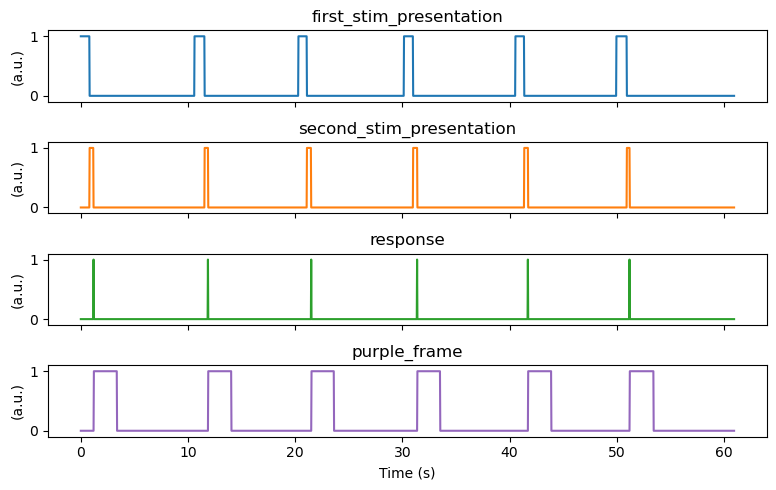

In [65]:
trial_types = events['trial_type'].unique()
n_types = len(trial_types) - 1  # Exclude 'iti'

# Define colors for each trial type (excluding 'iti')
color_map = {
    'first_stim_presentation': 'tab:blue',
    'second_stim_presentation': 'tab:orange',
    'response': 'tab:green',
    'purple_frame': 'tab:purple'
}

fig, axes = plt.subplots(n_types, 1, figsize=(8, 5), sharex=True)

plot_idx = 0
for ttype in trial_types:
    if ttype == 'iti':
        continue
    subset = events[events['trial_type'] == ttype]
    boxcar = np.zeros_like(t)
    for _, row in subset.iterrows():
        if ttype == 'response' and row['duration'] == 0:
            idx = np.argmin(np.abs(t - row['onset']))
            boxcar[idx] = 1
        else:
            mask = (t >= row['onset']) & (t < row['onset'] + row['duration'])
            boxcar[mask] = 1
    ax = axes[plot_idx] if n_types > 1 else axes
    ax.plot(t, boxcar, color=color_map.get(ttype, None))
    ax.set_title(ttype)
    ax.set_ylabel('(a.u.)')
    ax.set_ylim(-0.1, 1.1)
    plot_idx += 1

axes[-1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()
